## Correlation

In [92]:
import pandas as pd
import numpy as np

# create a sample dataset
data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [50, 60, 70, 80, 90],
    'Age': [20, 25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)

# calculate correlation matrix
corr = df.corr()
print(corr)

   Height  Weight  Age
0     150      50   20
1     160      60   25
2     170      70   30
3     180      80   35
4     190      90   40
        Height  Weight  Age
Height     1.0     1.0  1.0
Weight     1.0     1.0  1.0
Age        1.0     1.0  1.0


In [93]:
# Identify non-numeric columns
# non_numeric_columns = df_sales.select_dtypes(include=['object']).columns
# print("Non-numeric columns:", non_numeric_columns)
# 
# # Exclude non-numeric columns from the correlation calculation
# df_numeric = df_sales.drop(columns=non_numeric_columns)
# 
# # Calculate the correlation matrix
# correlation_matrix = df_numeric.corr()
# print(correlation_matrix)
df_sales = pd.read_excel("data/04 Handling Missing Data using Python_Saless.xlsx")
correlation_matrix=df_sales.corr(numeric_only=True)
print(correlation_matrix)

                 Store_Type  City_Type  Day_Temp  No_of_Customers     Sales
Store_Type         1.000000   0.478261  0.285247        -0.004855  0.198457
City_Type          0.478261   1.000000  0.240098        -0.287802  0.074625
Day_Temp           0.285247   0.240098  1.000000         0.813452 -0.178471
No_of_Customers   -0.004855  -0.287802  0.813452         1.000000 -0.123071
Sales              0.198457   0.074625 -0.178471        -0.123071  1.000000


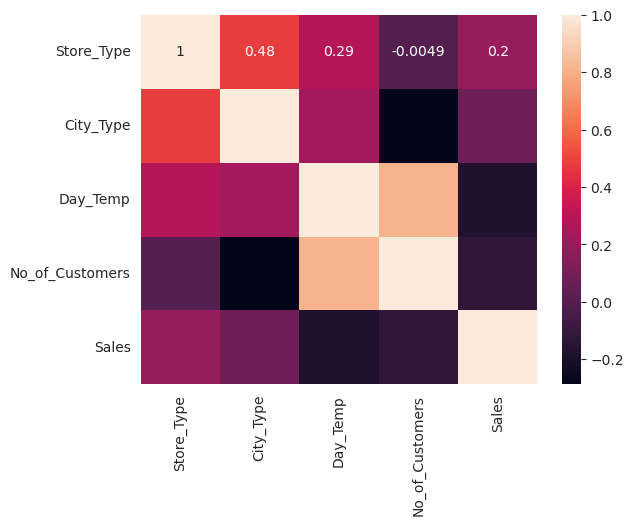

In [94]:
# print above as chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [95]:
import pandas as pd
from sklearn import datasets
import numpy as np

iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [96]:
# let's select for only 2 out of the given 3 spices
iris_df['target'] = iris_df.target.astype('int')
iris_df=iris_df[iris_df['target'].isin([0,1])]
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [97]:
#We now take out 50% of the petal length entries by chance and assign NaN values with a bit of numpy.
random_vec = np.random.random(iris_df["petal length (cm)"].size) < 0.5
iris_df["petal length (cm)"] = iris_df["petal length (cm)"].where(random_vec, other=np.nan)

iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,NaN,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,NaN,0.2,0
5,5.4,3.9,NaN,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,NaN,0.1,0


In [98]:
print("Petal Length μ = {}".format(iris_df["petal length (cm)"].mean()))
print("Petal Length σ^2 = {}".format(iris_df["petal length (cm)"].std()))

Petal Length μ = 2.8725490196078427
Petal Length σ^2 = 1.4945338311824927


### Imputation - with mean values
#### strategy : it is a method by using which we want to fill in the missing values. the missing value of the strategy could be "mean", "median", "most_frequent", "constant"

In [99]:
# make copy to avoid changing original data (when Imputing)
new_data = iris_df.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns
                     if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

features = new_data.columns

In [100]:
# Imputation
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = features

new_data.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal length (cm)_was_missing
0,5.1,3.5,1.400000,0.2,0.0,0.0
1,4.9,3.0,2.872549,0.2,0.0,1.0
2,4.7,3.2,1.300000,0.2,0.0,0.0
3,4.6,3.1,1.500000,0.2,0.0,0.0
4,5.0,3.6,2.872549,0.2,0.0,1.0
5,5.4,3.9,2.872549,0.4,0.0,1.0
6,4.6,3.4,1.400000,0.3,0.0,0.0
7,5.0,3.4,1.500000,0.2,0.0,0.0
8,4.4,2.9,1.400000,0.2,0.0,0.0
9,4.9,3.1,2.872549,0.1,0.0,1.0


In [101]:
import pandas as pd
import numpy as np

# Generate a list of random integers and add a manual outlier
lst = [np.random.randint(0, 100) for _ in range(100)]
global_outlier = [300]
df = pd.DataFrame(lst + global_outlier, columns=['number'])

# Calculate minimum and maximum percentile values
min_val = df['number'].quantile(0.05)
max_val = df['number'].quantile(0.95)

print("Minimum Percentile value:", min_val)
print("Maximum Percentile value:", max_val)

# Finding all the outliers
outliers = df[(df['number'] < min_val) | (df['number'] > max_val)]
print(outliers)


Minimum Percentile value: 5.0
Maximum Percentile value: 96.0
     number
1        97
13        2
20       97
22        4
49        1
73        2
74       98
80        0
100     300


In [102]:
# Finding all the outliers
outliers = df[(df['number'] < min_val[0]) | (df['number'] > max_val[0])]
print(outliers)


IndexError: invalid index to scalar variable.

In [ ]:
df.boxplot(['number'])

# ----------------------------------------------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)

df = pd.read_csv('data/train.csv')
df.head(10)

print("Before shape : ", df.shape)

# max and min quantile
min_val = df['Age'].quantile(0.05)
max_val = df['Age'].quantile(0.95)

# removing all the outliers
df2 = df[(df['Age'] > min_val) & (df['Age'] < max_val)]

# visualization
sns.boxplot(df['Age'], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(df2['Age'], orient='v', ax=axes[1])
axes[1].set_title("After")

plt.show()

Before shape :  (891, 12)
After shape :  (635, 12)
20.125 38.0
17.875
-6.6875 64.8125
Shape After Removing Outliers :  (891, 12)


Text(0.5, 1.0, 'After')

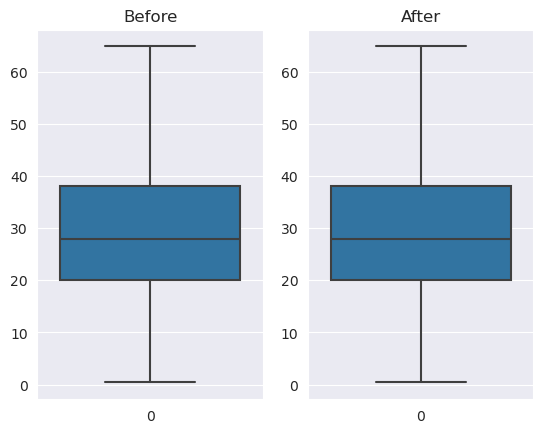

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)

df = pd.read_csv('data/train.csv')
df.head(10)

print("Before shape : ", df.shape)

# max and min quantile
min_val = df['Age'].quantile(0.05)
max_val = df['Age'].quantile(0.95)

# removing all the outliers
df2 = df[(df['Age'] > min_val) & (df['Age'] < max_val)]

print("After shape : ", df2.shape)

# sns.boxplot(df['Age'], orient='v', ax=axes[0])
# axes[0].set_title("Before")
# 
# sns.boxplot(df2['Age'], orient='v', ax=axes[1])
# axes[1].set_title("After")

########## Handling Outliers #############
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
print(Q1, Q3)

IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)

df2 = df
df2['Age'] = np.where(df2['Age'] > upper_limit, upper_limit, df2['Age'])
df2['Age'] = np.where(df2['Age'] < lower_limit, lower_limit, df2['Age'])

print("Shape After Removing Outliers : ", df2.shape)
sns.boxplot(df2['Age'], orient='v', ax=axes[0])
axes[0].set_title("Before")

sns.boxplot(df2['Age'], orient='v', ax=axes[1])
axes[1].set_title("After")

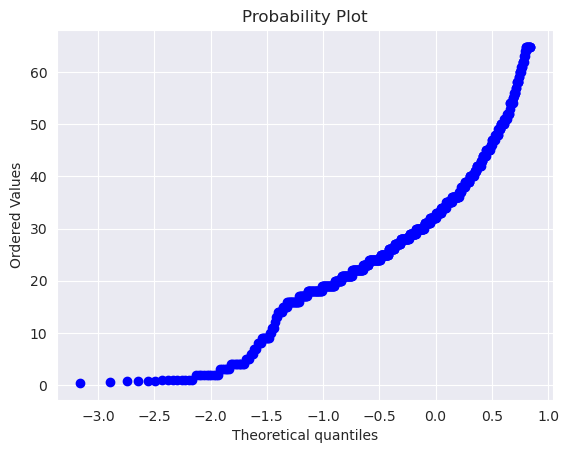

In [104]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# read your data
data = df

# create and show the plot
stats.probplot(data['Age'], dist='norm', plot=plt)

plt.show()

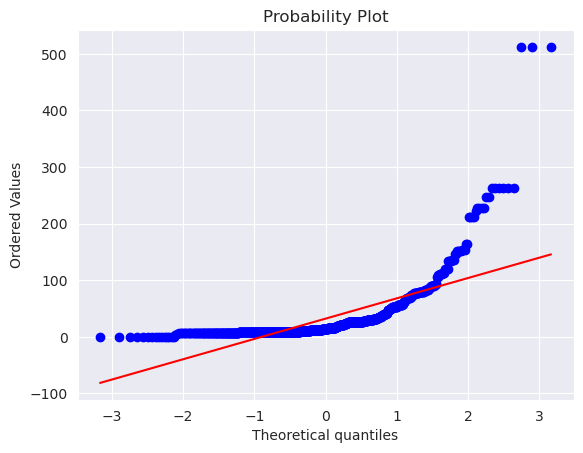

In [105]:
stats.probplot(data['Fare'], dist='norm', plot=plt)

plt.show()

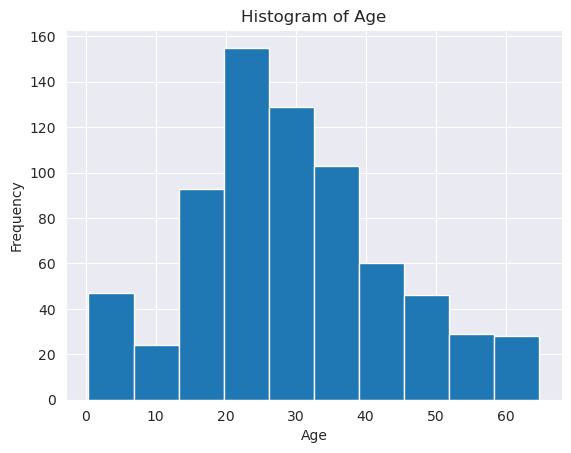

In [106]:
data['Age'].hist()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

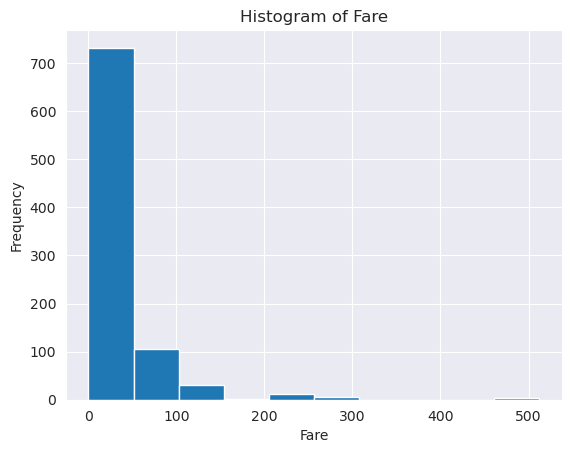

In [107]:
data['Fare'].hist()

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()